<a href="https://colab.research.google.com/github/Margo-s-M/AI_Colab/blob/decision_tree/%D0%94%D0%97_8_decisionnTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [3]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [4]:
df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,age,embarked,fare
0,3,22.0,S,7.2500
1,1,38.0,C,71.2833
2,3,26.0,S,7.9250
3,1,35.0,S,53.1000
4,3,35.0,S,8.0500


# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

<Axes: >

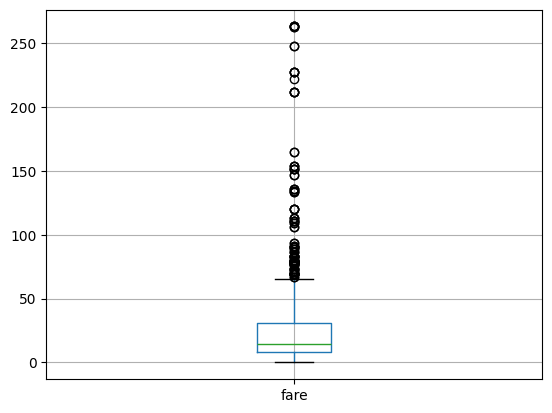

In [9]:
df.boxplot('fare')

In [8]:
mask = df['fare'] < 300
df = df[mask]

In [10]:
y = df['fare']
X = df.drop(columns= 'fare')
X.head(5)

,pclass,age,embarked
0,3,22.0,S
1,1,38.0,C
2,3,26.0,S
3,1,35.0,S
4,3,35.0,S


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,
                                                    random_state=42
                                                    )
X_train.shape, X_test.shape

((710, 3), (178, 3))

# Завдання 2
Створіть Pipeline для обробки даних

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [13]:
num_column = X_train.select_dtypes(include='number').columns
cat_column = X_train.select_dtypes(include='object').columns

num_column

Index(['pclass', 'age'], dtype='object')

In [14]:
num_transformer = Pipeline([
      ('impute', SimpleImputer(strategy='mean'))
])

In [15]:
cat_transformer = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [16]:
preprocessor = ColumnTransformer([
    ('num',num_transformer,num_column),
    ('cat', cat_transformer,cat_column)
])

preprocessor.set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['pclass', 'age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 Index(['embarked'], dtype='object'))])

# Завдання 3
Об'єднайте дерево рішень з препроцесором та натренуйте їх

In [17]:
from sklearn.tree import DecisionTreeRegressor
full_model = Pipeline([
    ('set', preprocessor),
    ('tree', DecisionTreeRegressor(max_depth=5))
    ])


In [18]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('set',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=5))])

# Завдання 4
Виведіть основні метрики моделі

In [19]:
from sklearn import metrics

pred = full_model.predict(X_test)
metrics.r2_score(y_test,pred)

0.3217044251751424

# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer(SimpleImputer vs KNNImputer) та кодування категоріальних даних(OneHotEncoder vs OrdinaryEncoder))
* змінити параметри дерева(глибина, кількість точок у листках тощо)

# Завдання 6
Збережіть модель